## 선형회귀(Linear Regression)

- 선형 회귀는 특성이 하나인 경우 그 특성을 가장 잘 나타낼 수 있는 직선을 학습하는 것이다.


최근접 이웃 회귀에서 예측했던 농어의 무게 예측을 선형 회귀로 재차 진행했다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./datasets/Fish.csv", encoding = "CP949")

In [3]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
perch_data = data[data['Species'] == 'Perch']

In [5]:
perch_length = perch_data['Length2']
perch_weight = perch_data['Weight']

In [6]:
perch_data = data[data['Species'] == 'Perch']

In [7]:
perch_length = perch_data['Length2']
perch_weight = perch_data['Weight']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(perch_length, perch_weight, random_state = 42)

In [9]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 1)
(14, 1)
(42,)
(14,)


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# 50cm인 농어 무게 예측
lr.predict([[50]])

array([1241.83860323])

최근접 이웃 회귀의 결과 1033g와 달리 선형 회귀는 1241g로 예측했다


선형 회귀는 $y = ax + b$의 식을 사용하며 이때, $a$는 기울기, $b$는 절편, $y$는 농어의 무게,  $x$는 농어의 길이를 의미한다.

In [12]:
# 모델의 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


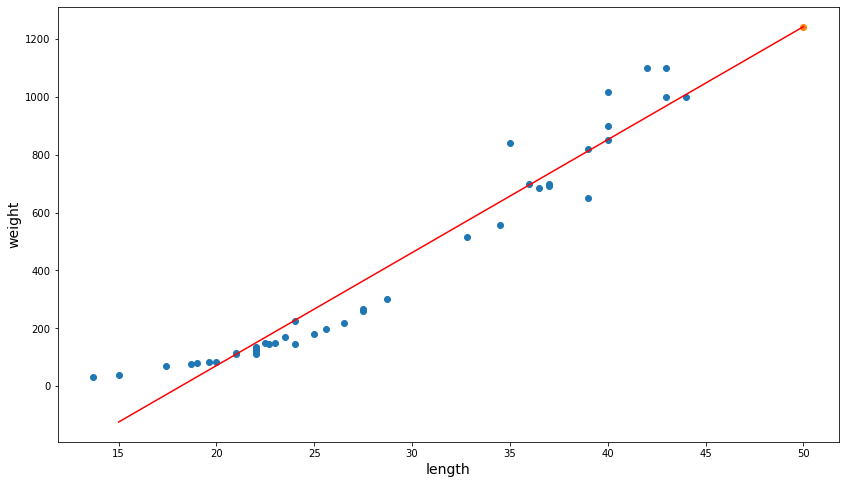

In [13]:
# 선형 회귀 직선
plt.figure(figsize = (14,8))
plt.scatter(x_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_],c = 'r')
plt.scatter(50,lr.predict([[50]]))
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.show()

In [14]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.939846333997604
0.8247503123313558


학습한 선형회귀는 train과 test의 점수차도 크고, 직선이나 데이터의 분포가 곡선임으로 잘 반영되었다고 보기 어렵다.

데이터의 곡선을 반영해주기 위해 **다항 회귀**를 진행했다.

## 다항 회귀 진행

- 다른 변수를 추가하기보단 농어의 길이를 제곱하여 새로운 열로 추가했다.

In [15]:
x_train = np.column_stack([x_train ** 2, x_train])
x_test = np.column_stack([x_test ** 2, x_test])

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
# 50cm인 농어 다항 회귀로 예측
lr.predict([[50**2,50]])

array([1573.98423528])

In [18]:
# 기울기와 절편
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


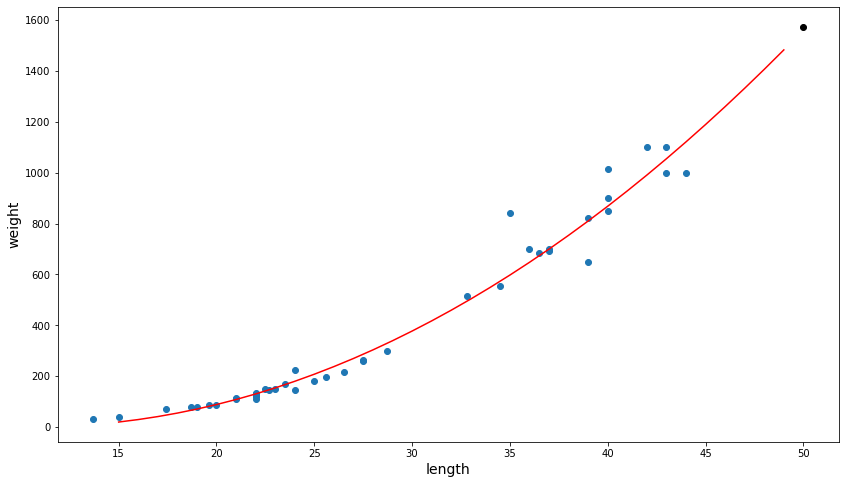

In [19]:
point = np.arange(15,50)
plt.figure(figsize = (14,8))
plt.scatter(x_train[:,1],y_train)
plt.plot(point,point**2*1.01-21.6*point+116.1, 'r')
plt.scatter(50,1574, c = 'black')
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.show()

In [20]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9706807451768623
0.9775935108325121


이전보다 점수는 높아졌지만 train보다 test의 점수가 높은 과소적합을 의심해 볼 수 있다. 좀 더 복잡한 모델을 만들어 볼 필요가 있음을 느꼈다.

## 다중 회귀

- 생선의 길이만 사용하는 것이 아닌 높이(Height)와 너비(Weight)를 추가한 다중 회귀 모델을 만들어 무게 예측을 진행했다.

In [29]:
perch_train = perch_data[['Length2','Height','Width']]
perch_target = perch_data[['Weight']]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(perch_train,perch_target, random_state = 42)